In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 42.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

# Loading dataset into notebook

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/SML Project Water Pumps/multitask data-water pump SML.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 57 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0.1    220320 non-null  int64  
 1   Unnamed: 0      220320 non-null  int64  
 2   timestamp       220320 non-null  object 
 3   sensor_00       210112 non-null  float64
 4   sensor_01       219951 non-null  float64
 5   sensor_02       220301 non-null  float64
 6   sensor_03       220301 non-null  float64
 7   sensor_04       220301 non-null  float64
 8   sensor_05       220301 non-null  float64
 9   sensor_06       215522 non-null  float64
 10  sensor_07       214869 non-null  float64
 11  sensor_08       215213 non-null  float64
 12  sensor_09       215725 non-null  float64
 13  sensor_10       220301 non-null  float64
 14  sensor_11       220301 non-null  float64
 15  sensor_12       220301 non-null  float64
 16  sensor_13       220301 non-null  float64
 17  sensor_14 

# Removing irrelevant columns, and columns with complete null values

In [ ]:
data=data.drop(['Unnamed: 0.1','Unnamed: 0','sensor_15'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_16       220289 non-null  float64
 17  sensor_17 

# Extracting and assigning date, month, day, minute and hour from the timestamp

In [ ]:
data['timestamp']=pd.to_datetime(data['timestamp'])
data['month']=data['timestamp'].dt.month
data['day']=data['timestamp'].dt.day
data['minute']=data['timestamp'].dt.minute
data['hour']=data['timestamp'].dt.hour

In [ ]:
data['machine_status'].value_counts() #value counts of the various machine status[Normal, Broken, Recovering]

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [ ]:
data=data.drop(['timestamp'],axis=1) #dropping timestamp once month, day, minute and hour are extracted and assigned
data.info()

# Visualizing missing values

<Axes: >

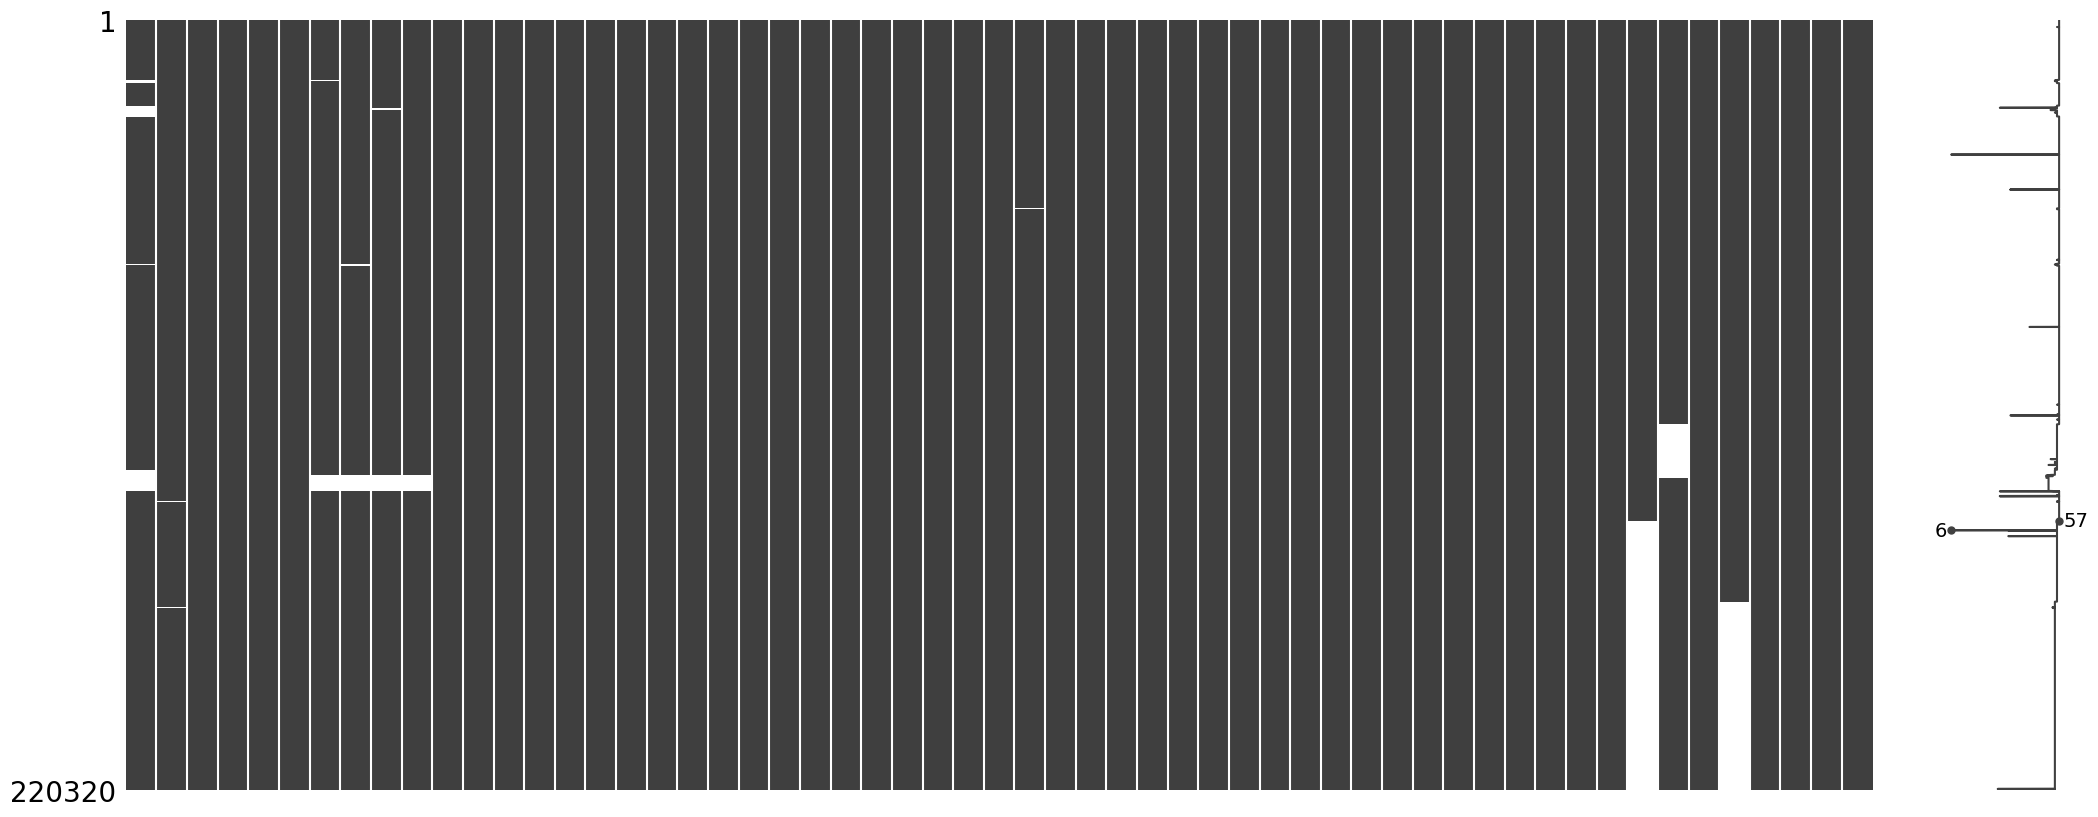

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
data1=data[~(np.isnan(data['rul']))]  #dataset that has non-null values of rul
data2=data[np.isnan(data['rul'])]  #dataset that has null values of rul

In [ ]:
data2['machine_status'].unique() #unique objects of machine status column of the null value dataset

array(['RECOVERING', 'NORMAL'], dtype=object)

In [ ]:
data1.shape,data2.shape

((166441, 57), (53879, 57))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Step 1: Label encode the "machine_status" column
label_encoder = LabelEncoder()
data1["machine_status"] = label_encoder.fit_transform(data1["machine_status"])

<ipython-input-12-7f151bdc5a71>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["machine_status"] = label_encoder.fit_transform(data1["machine_status"])


# KNN Imputer for sensor 50

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
columns_to_impute = data1.drop(['sensor_50'], axis=1)
data1[columns_to_impute.columns] = columns_to_impute.ffill() #imputation for sensor 50 using f fill

<ipython-input-13-5bfcbe4cc390>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[columns_to_impute.columns] = columns_to_impute.ffill() #imputation for sensor 50 using f fill


# Segragating null and non null values of the rows of sensor 50 (data1)

In [ ]:
bb=data1[np.isnan(data1['sensor_50'])]  #null values of sensor 50 of data1
cc=data1[~np.isnan(data1['sensor_50'])]  #non-null values of sensor 50 of data1
bb.shape,cc.shape

((23138, 57), (143303, 57))

# Assigning dependent(y) and independent(x) variables

In [ ]:
y_i=cc['sensor_50'] #setting target value as sensor 50 of non null values of sensor 50
x_i=cc.drop(['sensor_50'],axis=1)

# Using Decision tree Regressor to impute sensor 50 values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
x_train, x_test, y_train, y_test = train_test_split(x_i,y_i, test_size=0.25, random_state=42)
rfmodel = DecisionTreeRegressor()
rfmodel.fit(x_train, y_train)
o=rfmodel.predict(x_test)
print(rfmodel.score(x_test,y_test))
print(mean_squared_error(o,y_test))
print(mean_absolute_error(o,y_test))
print(r2_score(o,y_test))

0.9715203672139957
121.18411778641398
5.8406645889089175
0.9714662641522089


# Concatenating null(bb) and non null values(cc) of sensor 50 (data 1)

In [ ]:
bb=bb.drop(['sensor_50'],axis=1)
preds=rfmodel.predict(bb)
bb['sensor_50']=preds
data1=pd.concat([bb,cc],axis=0)
data1.isnull().sum()

sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
sensor_51         0


# Normalization of data1 before splitting it for training and testing

In [ ]:
from sklearn.preprocessing import StandardScaler
y1=data1['rul']
x1=data1.drop(['rul','sensor_50'],axis=1)
x1=StandardScaler().fit_transform(x1)
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x1,y1,test_size=0.2)

# Performing regression of RUL using various regressor models

In [ ]:
!pip install AutoLogging_ML

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [ ]:
from AutoLogging_ML import AutoLogger
a,model1=AutoLogger.train_and_log_regression(x_train_1,x_test_1,y_train_1,y_test_1)

# Evaluation of various regressor models for RUL prediction

In [ ]:
a

,model,training-mae,training-mse,training-mape,training-r2,training-median absolute error,training-maximum error,validation-mae,validation-mse,validation-mape,validation-r2,validation-median absolute error,validation-maximum error
0,linear regression,1.265615e+02,2.517908e+04,6.967214e+13,0.505714,109.569912,999.974509,126.992352,25330.520288,7.182958,0.503599,109.569912,999.974509
1,sgd regression,1.268632e+02,2.528418e+04,7.230364e+13,0.503651,109.856912,1000.271026,127.269498,25436.793684,7.266956,0.501516,109.856912,1000.271026
2,ridge regression,1.265648e+02,2.517908e+04,6.965336e+13,0.505714,109.576254,1000.119964,126.995354,25330.782468,7.182299,0.503594,109.576254,1000.119964
3,elastic net,1.543400e+02,3.467885e+04,7.296876e+13,0.319226,136.601301,606.656345,154.409333,34767.558621,7.478317,0.318662,136.601301,606.656345
4,decision tree regression,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.033333,746.500000,0.387967,121.339666,1.987407,0.997622,0.033333,746.500000
5,random forest regression,1.817671e-01,1.006563e+01,1.803843e+13,0.999802,0.022167,555.494500,0.479239,70.211363,2.200684,0.998624,0.022167,555.494500
6,adaboost regression,9.868478e+01,1.304080e+04,4.453343e+13,0.743998,97.586682,324.651359,98.717653,13074.164033,5.002491,0.743786,97.586682,324.651359
7,gradient boost regression,3.136047e+01,2.096832e+03,5.287874e+13,0.958837,22.265393,536.311257,31.455098,2115.917553,3.455918,0.958534,22.265393,536.311257
8,xgboost regression,5.209130e+00,8.613402e+01,3.248298e+12,0.998309,3.320471,277.686214,5.776368,132.918233,1.894998,0.997395,3.320471,277.686214
9,bagging regression,2.002493e-01,1.277412e+01,1.513348e+13,0.999749,0.030000,671.980000,0.507427,76.609674,2.274493,0.998499,0.030000,671.980000


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
rfmodel = ExtraTreesRegressor()
rfmodel.fit(x_train_1, y_train_1)
o=rfmodel.predict(x_test_1)
print(rfmodel.score(x_test_1,y_test_1))
print(mean_squared_error(o,y_test_1))
print(mean_absolute_error(o,y_test_1))
print(r2_score(o,y_test_1))

0.9998909748638619
5.563372003769185
0.18150755004155744
0.9998908437766119


In [ ]:
data2.isnull().sum()

sensor_00             3
sensor_01           279
sensor_02             3
sensor_03             3
sensor_04             3
sensor_05             3
sensor_06             3
sensor_07             3
sensor_08             3
sensor_09             3
sensor_10             3
sensor_11             3
sensor_12             3
sensor_13             3
sensor_14             0
sensor_16             0
sensor_17             0
sensor_18             0
sensor_19             0
sensor_20             0
sensor_21             0
sensor_22             0
sensor_23             0
sensor_24             0
sensor_25             0
sensor_26             0
sensor_27             0
sensor_28             0
sensor_29             0
sensor_30             0
sensor_31             0
sensor_32             0
sensor_33             0
sensor_34             0
sensor_35             0
sensor_36             0
sensor_37             0
sensor_38             3
sensor_39             3
sensor_40             3
sensor_41             3
sensor_42       

# Value counts of machine status classification

In [ ]:
data1['machine_status'].value_counts()

1    152032
2     14402
0         7
Name: machine_status, dtype: int64

# Label encoding of data2

In [ ]:
data2["machine_status"] = label_encoder.fit_transform(data2["machine_status"])
data2['machine_status']=data2['machine_status']+1
data2['machine_status'].value_counts()

<ipython-input-26-9c9bea3a9a3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["machine_status"] = label_encoder.fit_transform(data2["machine_status"])
<ipython-input-26-9c9bea3a9a3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['machine_status']=data2['machine_status']+1


1    53804
2       75
Name: machine_status, dtype: int64

# Filling null values of sensor 50 of data2 using f-fill

In [ ]:
data2=data2.drop(['sensor_50'],axis=1)
data2=data2.fillna(method='ffill')

#data2 showing the null values of RUL that is about to be imputed

In [ ]:
data2.isnull().sum()

sensor_00             0
sensor_01             0
sensor_02             0
sensor_03             0
sensor_04             0
sensor_05             0
sensor_06             0
sensor_07             0
sensor_08             0
sensor_09             0
sensor_10             0
sensor_11             0
sensor_12             0
sensor_13             0
sensor_14             0
sensor_16             0
sensor_17             0
sensor_18             0
sensor_19             0
sensor_20             0
sensor_21             0
sensor_22             0
sensor_23             0
sensor_24             0
sensor_25             0
sensor_26             0
sensor_27             0
sensor_28             0
sensor_29             0
sensor_30             0
sensor_31             0
sensor_32             0
sensor_33             0
sensor_34             0
sensor_35             0
sensor_36             0
sensor_37             0
sensor_38             0
sensor_39             0
sensor_40             0
sensor_41             0
sensor_42       

In [ ]:
data2=data2.drop(['rul'],axis=1)

# Concatenation of data1 and data2

In [ ]:
dat=StandardScaler().fit_transform(data2)
outs=rfmodel.predict(dat)
outs.shape
data2['rul']=outs
data_c=pd.concat([data1,data2],axis=0)

In [ ]:
data_c.isnull().sum()

sensor_00             0
sensor_01             0
sensor_02             0
sensor_03             0
sensor_04             0
sensor_05             0
sensor_06             0
sensor_07             0
sensor_08             0
sensor_09             0
sensor_10             0
sensor_11             0
sensor_12             0
sensor_13             0
sensor_14             0
sensor_16             0
sensor_17             0
sensor_18             0
sensor_19             0
sensor_20             0
sensor_21             0
sensor_22             0
sensor_23             0
sensor_24             0
sensor_25             0
sensor_26             0
sensor_27             0
sensor_28             0
sensor_29             0
sensor_30             0
sensor_31             0
sensor_32             0
sensor_33             0
sensor_34             0
sensor_35             0
sensor_36             0
sensor_37             0
sensor_38             0
sensor_39             0
sensor_40             0
sensor_41             0
sensor_42       

In [ ]:
data_c=data_c.drop(['sensor_50'],axis=1)

# Making a csv file for concatenated data (data_c)

In [ ]:
data_c.to_csv('filled dataset for multitask model.csv')

# Value counts of machine status

In [ ]:
data_c['machine_status'].value_counts()

1    205836
2     14477
0         7
Name: machine_status, dtype: int64

In [ ]:
data_c.isnull().sum().sum()

0

# Using ANN to perform classification and regression

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.callbacks import *
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

# Assigning target layers(y) of ANN

In [ ]:
status=data_c['machine_status']
status=to_categorical(status,num_classes=3)
rul=data_c['rul']
x=data_c.drop(['machine_status','rul'],axis=1)
x=MinMaxScaler().fit_transform(x)
x_train,x_test,y_train1,y_test1,y_train2,y_test2=train_test_split(x,status,rul,test_size=0.2)

In [ ]:
np.unique(status)

array([0., 1.], dtype=float32)

In [ ]:
x_train.shape

(176256, 54)

In [ ]:
inputs = tf.keras.layers.Input(shape=([54]), name='input')
main_branch=tf.keras.layers.Dense(128,activation='relu',name='shared_hidden')(inputs)
main_reg=tf.keras.layers.BatchNormalization(name='shared_batchnorm')(main_branch)
status_op = tf.keras.layers.Dense(3, activation='softmax', name='status_output')(main_reg)
task_2 = tf.keras.layers.Dense(32, activation='relu',name='rul_hidden')(main_reg)
tas_2= tf.keras.layers.Dropout(0.1,name='rul_dropout')(task_2)
rul_op=tf.keras.layers.Dense(1,activation='linear',name='rul_output')(tas_2)
model = tf.keras.Model(inputs = inputs, outputs = [status_op, rul_op])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 54)]         0           []                               
                                                                                                  
 shared_hidden (Dense)          (None, 128)          7040        ['input[0][0]']                  
                                                                                                  
 shared_batchnorm (BatchNormali  (None, 128)         512         ['shared_hidden[0][0]']          
 zation)                                                                                          
                                                                                                  
 rul_hidden (Dense)             (None, 32)           4128        ['shared_batchnorm[0][0]']   

# Architecture of the ANN

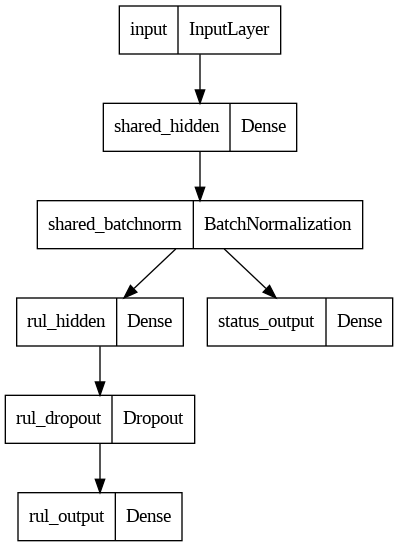

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
model.compile('adam',{'status_output':'categorical_crossentropy','rul_output':tf.keras.losses.MeanAbsoluteError()}
              ,metrics={'status_output':['categorical_accuracy','Precision','Recall','AUC'],'rul_output':['mae','mse',tf.keras.metrics.RootMeanSquaredError(
    name='root_mean_squared_error', dtype=None
),'msle']})

#Setting learning rate to decrease if there is no improvement after 2 epochs

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr=ReduceLROnPlateau(monitor='val_rul_output_loss',factor=0.05,patience=2)
model_history = model.fit(x_train,[y_train1,y_train2],
                            epochs=50, batch_size=400, validation_data=(x_test,[y_test1,y_test2]),callbacks=lr)

Epoch 1/50
441/441 [==============================] - 5s 7ms/step - loss: 177.9030 - status_output_loss: 0.1563 - rul_output_loss: 177.7466 - status_output_categorical_accuracy: 0.9747 - status_output_precision: 0.9836 - status_output_recall: 0.9599 - status_output_auc: 0.9940 - rul_output_mae: 177.7466 - rul_output_mse: 65957.9453 - rul_output_root_mean_squared_error: 256.8228 - rul_output_msle: 3.5100 - val_loss: 138.3041 - val_status_output_loss: 0.0584 - val_rul_output_loss: 138.2457 - val_status_output_categorical_accuracy: 0.9726 - val_status_output_precision: 0.9738 - val_status_output_recall: 0.9708 - val_status_output_auc: 0.9987 - val_rul_output_mae: 138.2456 - val_rul_output_mse: 35810.7500 - val_rul_output_root_mean_squared_error: 189.2373 - val_rul_output_msle: 0.6678 - lr: 0.0010
Epoch 2/50
441/441 [==============================] - 2s 5ms/step - loss: 66.3839 - status_output_loss: 0.0193 - rul_output_loss: 66.3646 - status_output_categorical_accuracy: 0.9941 - status_out

In [ ]:
model.evaluate(x_train,[y_train1,y_train2])

5508/5508 [==============================] - 13s 2ms/step - loss: 18.1567 - status_output_loss: 0.0075 - rul_output_loss: 18.1492 - status_output_categorical_accuracy: 0.9973 - status_output_precision: 0.9973 - status_output_recall: 0.9973 - status_output_auc: 1.0000 - rul_output_mae: 18.1492 - rul_output_mse: 1387.5217 - rul_output_root_mean_squared_error: 37.2495 - rul_output_msle: 0.1396


[18.156696319580078,
 0.007492078468203545,
 18.149213790893555,
 0.9972993731498718,
 0.9973220229148865,
 0.9972937107086182,
 0.9999520182609558,
 18.149213790893555,
 1387.521728515625,
 37.249454498291016,
 0.139574334025383]

In [ ]:
print(tf.keras.__version__)

2.9.0


In [ ]:
model.evaluate(x_test,[y_test1,y_test2])

1377/1377 [==============================] - 4s 3ms/step - loss: 18.6761 - status_output_loss: 0.0078 - rul_output_loss: 18.6683 - status_output_categorical_accuracy: 0.9968 - status_output_precision: 0.9968 - status_output_recall: 0.9968 - status_output_auc: 1.0000 - rul_output_mae: 18.6683 - rul_output_mse: 1511.0463 - rul_output_root_mean_squared_error: 38.8722 - rul_output_msle: 0.1467


[18.676116943359375,
 0.007838474586606026,
 18.668256759643555,
 0.9968001246452332,
 0.9968001246452332,
 0.9968001246452332,
 0.9999558329582214,
 18.668256759643555,
 1511.0462646484375,
 38.87217712402344,
 0.14666526019573212]

# Loss curve evaluation metrics (RUL & Status)

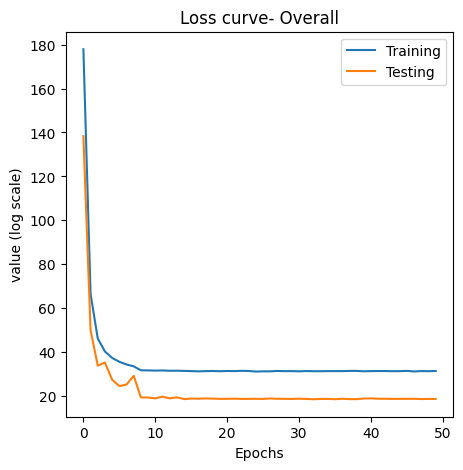

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- Overall")
plt.plot(model_history.history["loss"], label="Training")
plt.plot(model_history.history["val_loss"], label="Testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

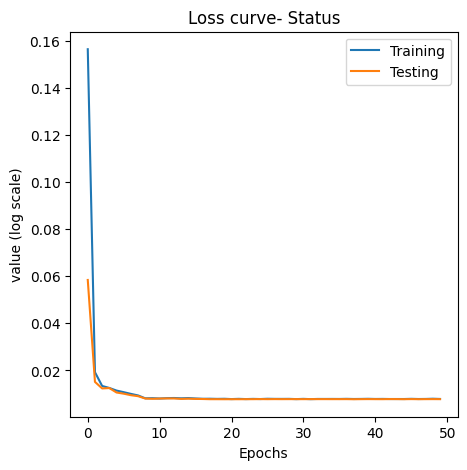

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- Status")
plt.plot(model_history.history["status_output_loss"], label="Training")
plt.plot(model_history.history["val_status_output_loss"], label="Testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

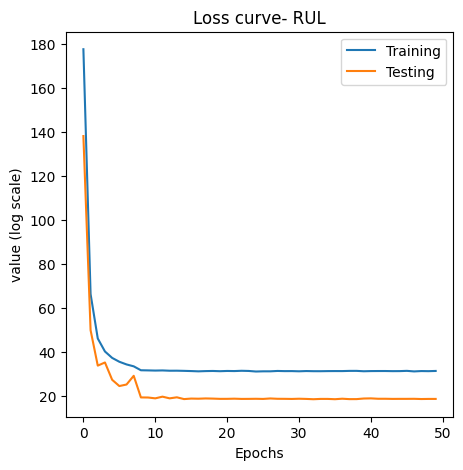

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss curve- RUL")
plt.plot(model_history.history["rul_output_loss"], label="Training")
plt.plot(model_history.history["val_rul_output_loss"], label="Testing")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred=model.predict(x_test)
y_pred_1= y_pred[0]
y_pred_2=y_pred[1]
y_pred_1= np.argmax(y_pred_1,axis=1)
y_test1=np.argmax(y_test1,axis=1)
print('status classification CM-test')
sns.heatmap(confusion_matrix(y_test1,y_pred_1), annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred_1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00     41208
           2       0.96      0.99      0.98      2855

    accuracy                           1.00     44064
   macro avg       0.65      0.66      0.66     44064
weighted avg       1.00      1.00      1.00     44064



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test1=to_categorical(y_test1,num_classes=3)
y_pred_1=to_categorical(y_pred_1,num_classes=3)

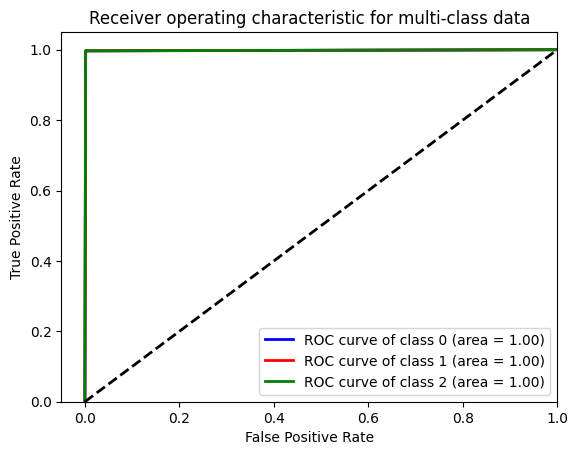

In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test1.ravel(), y_pred_1.ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.save('multitask model sml project.h5')